In [1]:
#!pip install opencv-python
#!pip install matplotlib
#!pip install numpy
#!pip install seaborn

In [2]:
# Acesso aos pixels da imagem

import numpy as np
import cv2 #Opencv

#exibir imagem na mesma tela do Jupyter
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_style("whitegrid", {"Axes.grid" : False})

#Carregar Imagens no google colab com Skimage e ixibindo a imagem com o Opencv
from skimage import io
from google.colab.patches import cv2_imshow #porque função cv2.imshow é incompativel com jupyter notebook

In [3]:
#Carregar imagem
from google.colab import files
uploaded = files.upload()

Saving Mugetsu.jpg to Mugetsu.jpg


# Transformações de imagens

# Transformações geometricas, tais como rotação, translação e redimencionamento.

A transformação da imagem é umprocesso de alteração das coodenadas. Ele mapeia algum ponto (xo,yo) para ponto (xd, yd) em um sistemas de coordenadas.

> Entre inúmeras aplicações, é possivel usar como exemplo os veiculos autônomos quando fazem leitura dos sinais de trânsito.

##### Transformação afim.

Na transformação afim as linhas permanecerão as mesmas. Ainda assim, o quadrado pode se transformar em um retangulo ou paralelogramo. Funfiona presenvando os comprimentos e ângulos. No openCV, a transformação Affine utiliza o método **getAffineTransformation**

# Rotação



> Linhas, Altura


Utilizando uma imagem do banco de imagens.



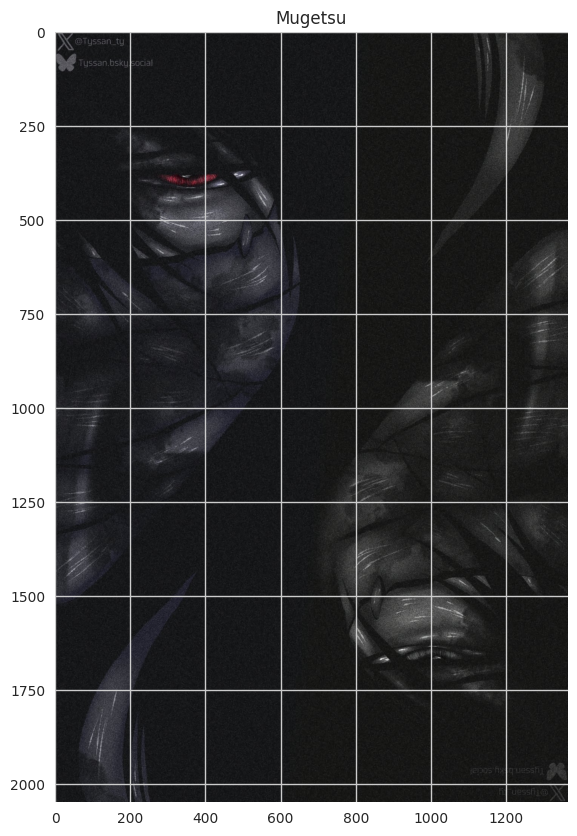

In [4]:
imagem = cv2.imread("/content/Mugetsu.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,10))
plt.imshow(imagem)
plt.title("Mugetsu")
plt.show()

Aplicando matriz de rotação e incluindo ma transformação afim.

A Função **getRotationMatriz** é usada para definir o parâmetro necessario
na função **warpAffine** para a formação de uma matriz que possa fornecer um ângulo de rotação necessário (no caso -5 graus), sem encolhimentos da imagem (valor -1).

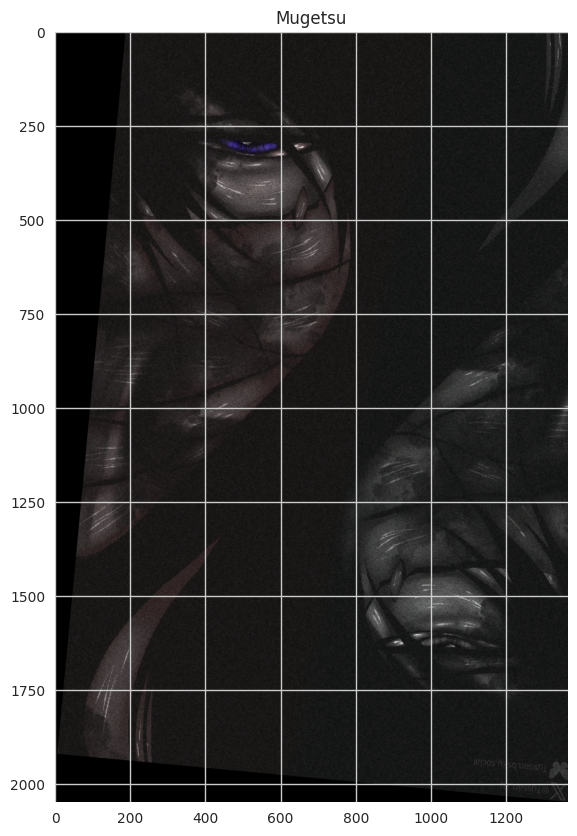

In [9]:
# Read the image
img = cv2.imread("/content/Mugetsu.jpg")
height, widht = img.shape[:2]

matriz_rotacao = cv2.getRotationMatrix2D((widht, height), -5.4, 1)

#Rotate the Image using cv2.warpAffine()

out = cv2.warpAffine(img, matriz_rotacao, (img.shape[1], img.shape[0]))

plt.figure(figsize=(30,10))
plt.imshow(out)
plt.title("Mugetsu")
plt.show()

In [31]:
height, widht = img.shape[:2]
matriz_rotacao = cv2.getRotationMatrix2D((widht, height), -5.4, 1)
print (matriz_rotacao)

[[ 9.95561965e-01 -9.41083133e-02  1.98787306e+02]
 [ 9.41083133e-02  9.95561965e-01 -1.19274643e+02]]


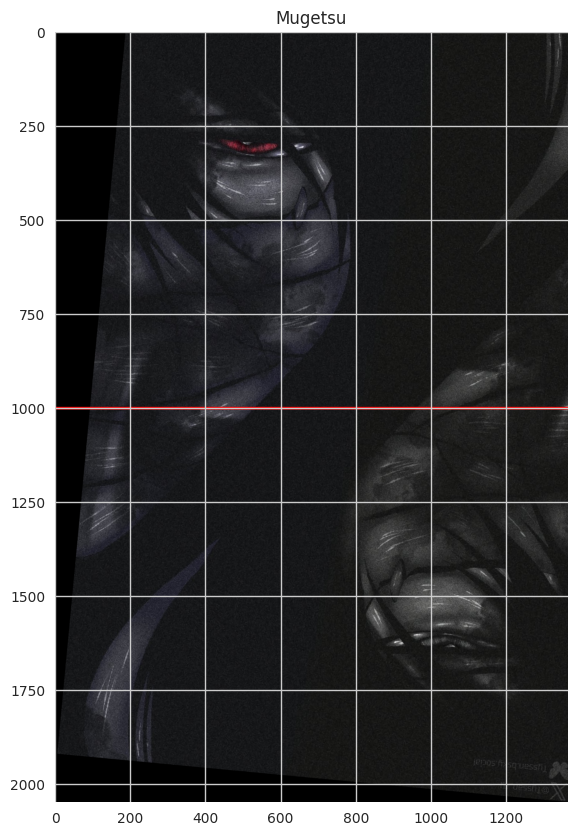

In [34]:
imagem_rotacionada = cv2.warpAffine(imagem, matriz_rotacao, (widht, height))

cv2.line(imagem_rotacionada, (0,1000),(2500, 1000), (255,0, 0), 5)

plt.figure(figsize=(30,10))
plt.imshow(imagem_rotacionada)
plt.title("Mugetsu")
plt.show()

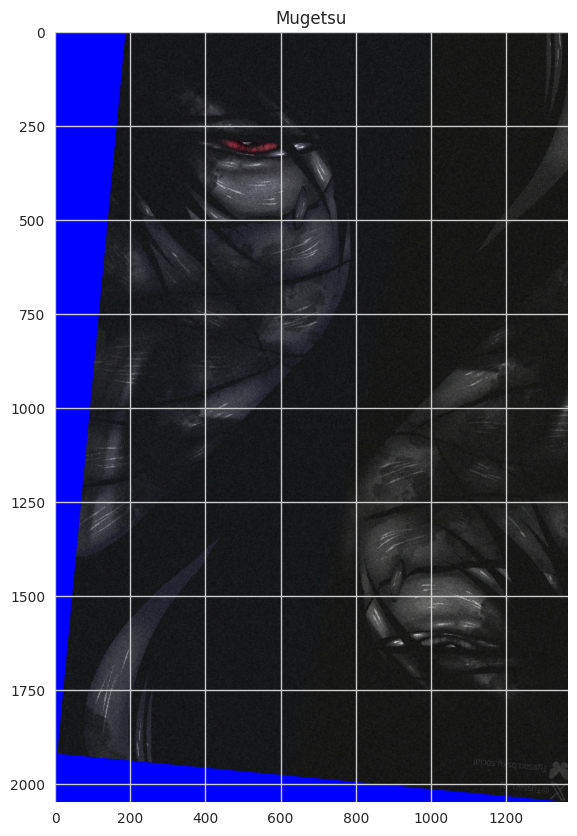

In [36]:
imagem_rotacionada = cv2.warpAffine(imagem, matriz_rotacao, (widht, height), borderValue=(0,0,255))

plt.figure(figsize=(30,10))
plt.imshow(imagem_rotacionada)
plt.title("Mugetsu")
plt.show()

# Translação



> Colunas, Largura.

Carregando uma imagem previamente existente



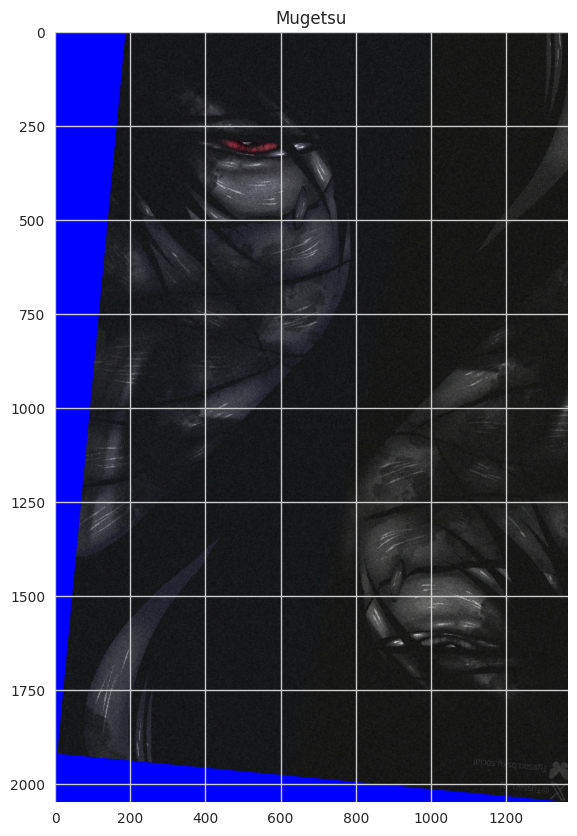

In [37]:
plt.figure(figsize = (30,10))
plt.imshow(imagem_rotacionada)
plt.title("Mugetsu")
plt.show()

In [39]:
height, widht = imagem.shape [:2]

# Vamos alterar o tamanho para 25% do original
height_altrernado, widht_alternado = height/4, widht/4

#matriz de translação
matriz_translacao = np.float32([[1, 0, 200], [0, 1, 0]])

print(matriz_translacao)

[[  1.   0. 200.]
 [  0.   1.   0.]]


Text(0.5, 1.0, 'Mugetsu')

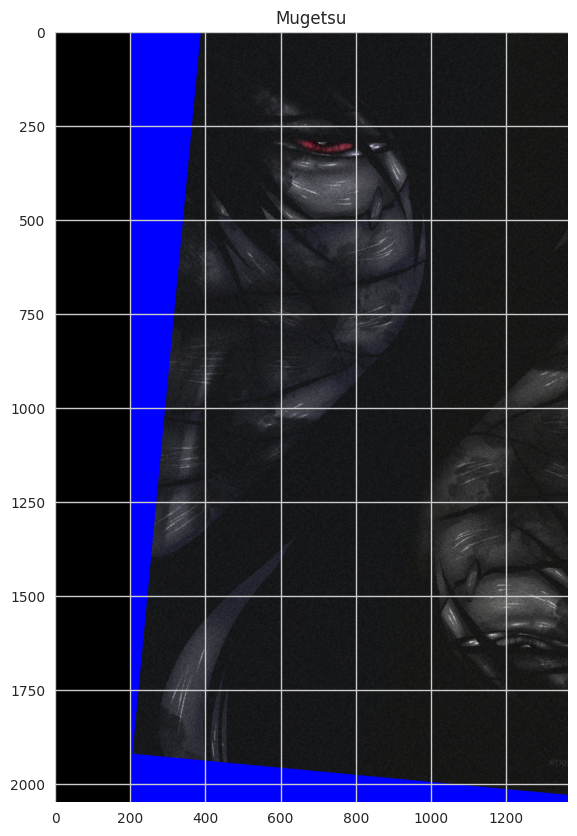

In [41]:
imagem_transladada = cv2.warpAffine(imagem_rotacionada, matriz_translacao, (widht, height))

plt.figure(figsize=(30,10))
plt.imshow(imagem_transladada)
plt.title("Mugetsu")

Text(0.5, 1.0, 'Mugetsu')

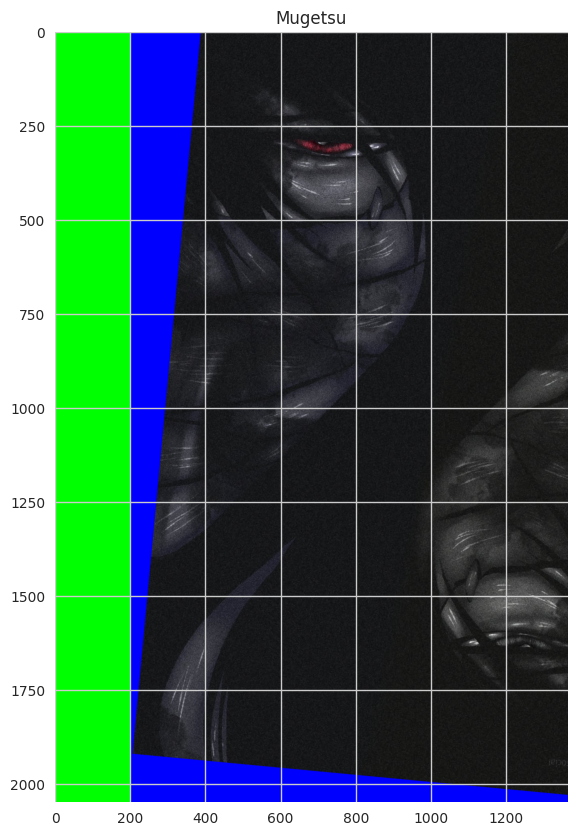

In [43]:
imagem_transladada = cv2.warpAffine(imagem_rotacionada, matriz_translacao, (widht, height), borderValue=(0,255,0))

plt.figure(figsize=(30,10))
plt.imshow(imagem_transladada)
plt.title("Mugetsu")

Aplicando translação no sentido inverso, utilizando valores negativos.

In [44]:
matriz_translacao = np.float32([[1, 0, -300], [0, 1, 0]])

#Matriz de Translação

print(matriz_translacao)

[[   1.    0. -300.]
 [   0.    1.    0.]]


Text(0.5, 1.0, 'Mugetsu')

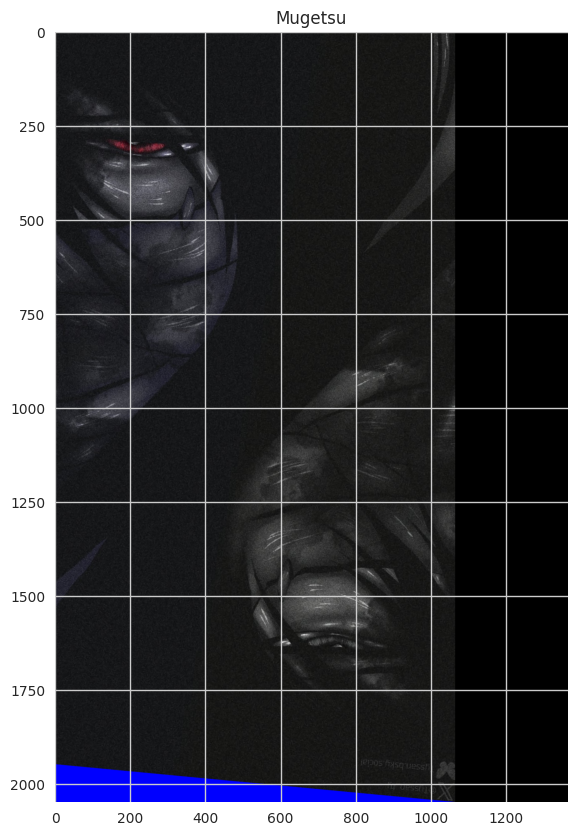

In [45]:
imagem_transladada = cv2.warpAffine(imagem_rotacionada, matriz_translacao, (widht, height))

plt.figure(figsize=(30,10))
plt.imshow(imagem_transladada)
plt.title("Mugetsu")

# Redimensionamento e interpolação

Frequentemente usado na área de visão computacional e processamento de imagens, o
redimensionamento de imagem consiste, de modo geral, em aumentar ou diminuir a imagem.

O OpenCV traz o método resize para se realizar o dimensionamento da imagem.

O redimensionamento de imagens pode utilizar uma série de interpolações que servem para cobrir os pixels que são expandidos. Cada tipo de
interpolação traz aspectos de maior nitidez e velocidade de processamento.


Carregando uma imagem previamente existente


Text(0.5, 1.0, 'Mugetsu')

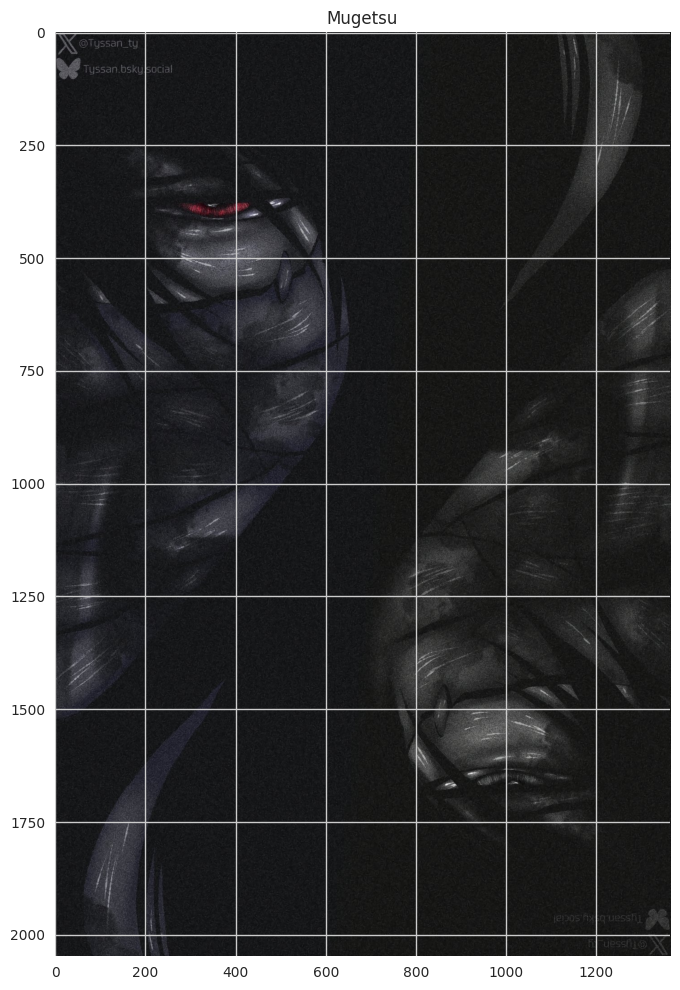

In [47]:
image = cv2.imread("/content/Mugetsu.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(16,12))
plt.imshow(image)
plt.title("Mugetsu")

Escala por fator (multiplicação)

Text(0.5, 1.0, 'Lanczos')

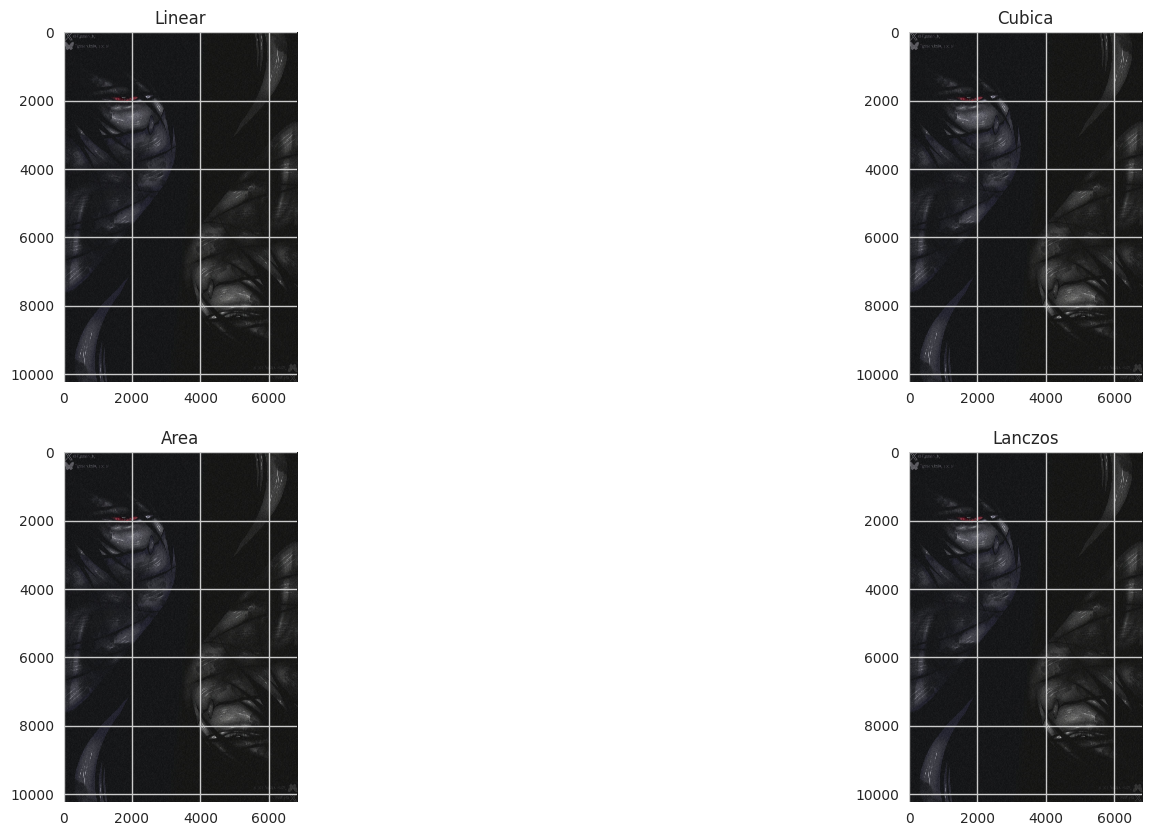

In [49]:
fator_x=5
fator_y=5

imagem_nova_linear = cv2.resize(imagem, None, fx=fator_x, fy=fator_y)
imagem_nova_cubica = cv2.resize(imagem, None, fx=fator_x, fy=fator_y, interpolation=cv2.INTER_CUBIC)
imagem_nova_area = cv2.resize(imagem, None, fx=fator_x, fy=fator_y, interpolation=cv2.INTER_AREA)
imagem_nova_area = cv2.resize(imagem, None, fx=fator_x, fy=fator_y, interpolation=cv2.INTER_LANCZOS4)

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.imshow(imagem_nova_linear)
plt.title("Linear")
plt.subplot(2,2,2)
plt.imshow(imagem_nova_cubica)
plt.title("Cubica")
plt.subplot(2,2,3)
plt.imshow(imagem_nova_area)
plt.title("Area")
plt.subplot(2,2,4)
plt.imshow(imagem_nova_area)
plt.title("Lanczos")